# <span style = 'color : blue '> **Tuyet Nhi Nguyen** </span>


### <span style='color:blue '> *The demographic of unqualified applications* </span>
#### *(The result will provide the answer how the different demographic attributes of specific customer affect their application's decison. From there, AlphaFin will know who are the unqualified applications' based on their demographic, as a result, they could consider whethere changing the policy for the loan application or they should keep as it is.)*


#### - This analysis report will use Multiple Linear Regression technique
#### - Independent variables including all the demographic attributes:
    1. Gender
    2. Married (status)
    3. Education
    4. Income
    5. Credit_History
#### - Dependent variable: Loan_Approved
y = b0 + b1x1 + b2x2 + b3x3...
Bs is coefficient

In [82]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smmg
import pandas as pd
import numpy as np
import scipy.stats as st
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use ('seaborn')

In [83]:
#Upload Alpha dataset
unqualAF = pd.read_csv("./desktop/Data/alpha.csv")
unqualAF.head()


,CustomerID,Gender,Married,Loan_Amount,Loan_Approved,Education,Income,Credit_History
0,C001041,Male,Yes,115.0,Y,Graduate,2600,1.0
1,C001043,Male,Yes,104.0,N,Not Graduate,7660,0.0
2,C001046,Male,Yes,315.0,Y,Graduate,5955,1.0
3,C001047,Male,Yes,116.0,N,Not Graduate,2600,0.0
4,C001050,NaN,Yes,112.0,N,Not Graduate,3365,0.0


In [84]:
#drop null values
unqualAF = unqualAF.dropna()

In [85]:
#drop duplicated values
unqualAF = unqualAF.drop_duplicates()

In [86]:
#showing the columns' names of the dataframe
list(unqualAF)

['CustomerID',
 'Gender',
 'Married',
 'Loan_Amount',
 'Loan_Approved',
 'Education',
 'Income',
 'Credit_History']

In [87]:
#calculate simple statistic for numeric fields including Loan_Amount, Income, and Credit_History using .T function
unqualAF.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Loan_Amount,825.0,141.265455,73.380334,9.0,100.0,126.0,162.0,600.0
Income,825.0,5129.241212,5628.726134,0.0,2894.0,3813.0,5503.0,81000.0
Credit_History,825.0,0.836364,0.370170,0.0,1.0,1.0,1.0,1.0


In [88]:
unqualAF.dtypes

CustomerID         object
Gender             object
Married            object
Loan_Amount       float64
Loan_Approved      object
Education          object
Income              int64
Credit_History    float64
dtype: object

In [89]:
unqualAF['Gender'] = pd.to_numeric(unqualAF['Gender'], errors = 'coerce')
unqualAF['Married'] = pd.to_numeric(unqualAF['Married'], errors = 'coerce')
unqualAF['CustomerID'] = pd.to_numeric(unqualAF['CustomerID'], errors = 'coerce')
unqualAF['Loan_Approved'] = pd.to_numeric(unqualAF['Loan_Approved'], errors = 'coerce')
unqualAF['Education'] = pd.to_numeric(unqualAF['Education'], errors = 'coerce')
unqualAF.dtypes

CustomerID        float64
Gender            float64
Married           float64
Loan_Amount       float64
Loan_Approved     float64
Education         float64
Income              int64
Credit_History    float64
dtype: object

In [92]:
unqualAF.head ()

,CustomerID,Gender,Married,Loan_Amount,Loan_Approved,Education,Income,Credit_History
0,NaN,NaN,NaN,115.0,NaN,NaN,2600,1.0
1,NaN,NaN,NaN,104.0,NaN,NaN,7660,0.0
2,NaN,NaN,NaN,315.0,NaN,NaN,5955,1.0
3,NaN,NaN,NaN,116.0,NaN,NaN,2600,0.0
6,NaN,NaN,NaN,191.0,NaN,NaN,9560,1.0


In [90]:
#Correlation Analysis between Income and Loan_Amount
unqualAF[['Income', 'Loan_Amount']].corr()


,Income,Loan_Amount,Loan_Approved
Income,1.000000,0.502766,NaN
Loan_Amount,0.502766,1.000000,NaN
Loan_Approved,NaN,NaN,NaN


In [91]:
model = smf.ols('Loan_Approved ~ Gender + Married + Loan_Amount + Education + Income + Credit_History', unqualAF).fit()
print (model.summary())

ValueError: zero-size array to reduction operation maximum which has no identity

KeyError: 'Quality'

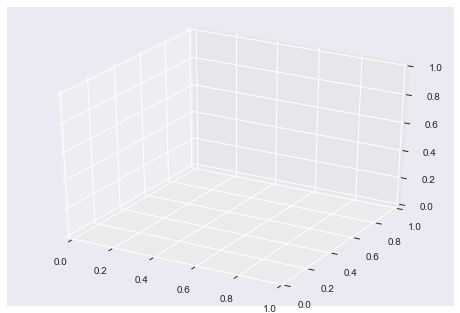

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(unqualAF['Quality'], unqualAF['Speed'], unqualAF['Angle'], c='b', marker='o')
ax.set_xlabel('Speed, X1')
ax.set_ylabel('Angle, X2')
ax.set_zlabel('Quality, Y')
plt.savefig("3Dcatterplot.png")

In [69]:
model = smf.ols('Loan_Approved ~ Gender + Married + Loan_Amount + Education + Income + Credit_History',unqualAF).fit()
print (model.summary())

ValueError: zero-size array to reduction operation maximum which has no identity